## Import libraries

In [1]:
from scraper import *
import pandas as pd
import isthmuslib as isli
from tqdm.auto import tqdm
import pathlib
import numpy as np

## Setup params

In [2]:
cache_path: str = str(pathlib.Path.cwd() / '..' / 'data' / '2021_12_29_data.pickle')
style: isli.Style = isli.Style(watermark_text="             Isthmus - github.com/mitchellpkt/firo-forensics",
                               watermark_fontsize=12, grid=False)

## Initialize - load from cache or scrape

In [3]:
if cache_path:
    df: pd.DataFrame = pd.read_pickle(cache_path).drop(columns='height')
else:
    for height in tqdm(range(437410, 438059)):
        df = df.append(get_metadata(height), ignore_index=True)
    df: pd.DataFrame = pd.DataFrame({'height': []})
    df.to_pickle(cache_path)

In [4]:
df.head()  # See the result

,block_height,coinbase_data,decoded_coinbase,timestamp_human,timestamp_unix
0,437410.0,cd68d274f8a37499743e7bcec3b955923b2131b36d93b5...,¢¬ÌÝÊa    c2Miners https://2miners.com,"Tue, 28 Dec 2021 09:50:04 UTC",1.640685e+09
1,437411.0,fa697a0264752ecd499c104480956acc68a934ad7aca5b...,£¬%ÞÊa     Á¿2Miners https://2miners.com,"Tue, 28 Dec 2021 09:51:33 UTC",1.640685e+09
2,437412.0,3b088551d172830e682128e8611abb3717cbcc228a8660...,¤¬ÞÊa     ~'2Miners https://2miners.com,"Tue, 28 Dec 2021 09:53:06 UTC",1.640685e+09
3,437413.0,35a59f1f10db69ccb6f2ea7cdad70c9f20ace4a800ca8a...,¥¬ÞÊa     2Miners https://2miners.com,"Tue, 28 Dec 2021 09:53:18 UTC",1.640685e+09
4,437414.0,aef1f230fcb120eb307fbdbba8322628cb50f86a6de5e3...,¦¬ ãÊa     É2Miners https://2miners.com,"Tue, 28 Dec 2021 10:12:16 UTC",1.640686e+09


In [5]:
df.describe()

,block_height,timestamp_unix
count,649.000000,6.490000e+02
mean,437734.000000,1.640774e+09
std,187.494444,5.241967e+04
min,437410.000000,1.640685e+09
25%,437572.000000,1.640729e+09
50%,437734.000000,1.640774e+09
75%,437896.000000,1.640819e+09
max,438058.000000,1.640868e+09


## Visualizations

In [6]:
marker_line = lambda: isli.plt.axvline(437916, color='b', linestyle=':')

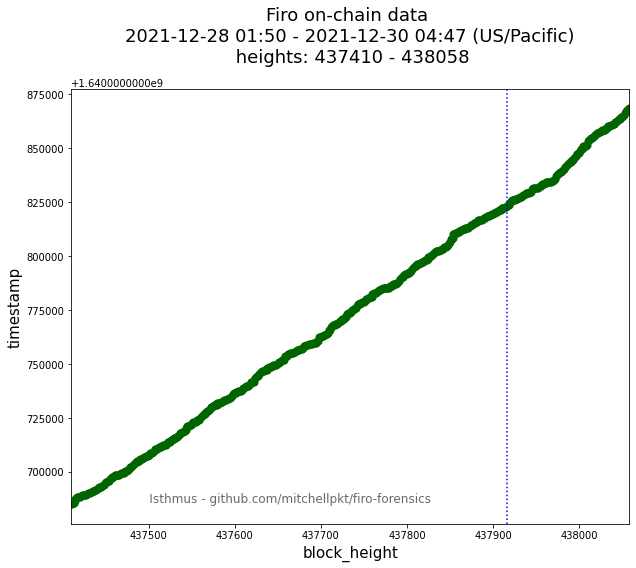

In [7]:
title: str = f'Firo on-chain data \n{isli.human_time(min(df.timestamp_unix), formatter="%Y-%m-%d %H:%M", include_timezone=False)} - {isli.human_time(max(df.timestamp_unix), formatter="%Y-%m-%d %H:%M")}\n heights: {min(df.block_height):.0f} - {max(df.block_height):.0f}'
isli.scatter(df, 'block_height', 'timestamp_unix', xlabel='block_height', ylabel='timestamp',
             title=f"{title}\n", style=style, legend_strings=[]);
marker_line();

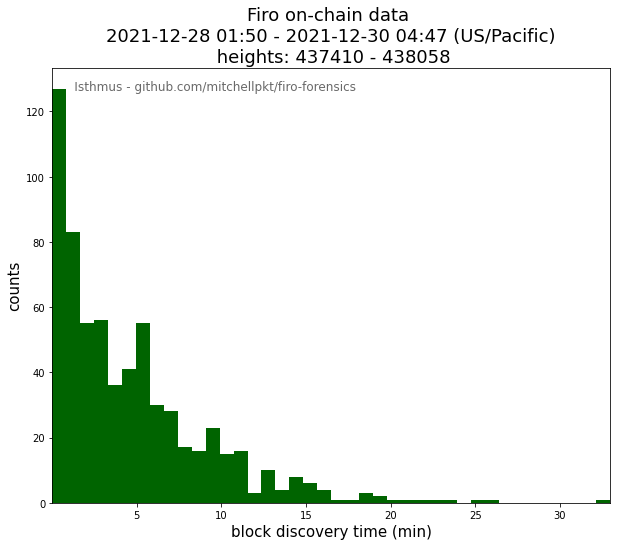

In [8]:
isli.hist((diffs := [(x[0] - x[1]) / 60 for x in zip(df.timestamp_unix[1:], df.timestamp_unix)]), title=title, bins=40,
          xlabel='block discovery time (min)', style=style.override({'watermark_placement': (-0.05, 0.95)}));

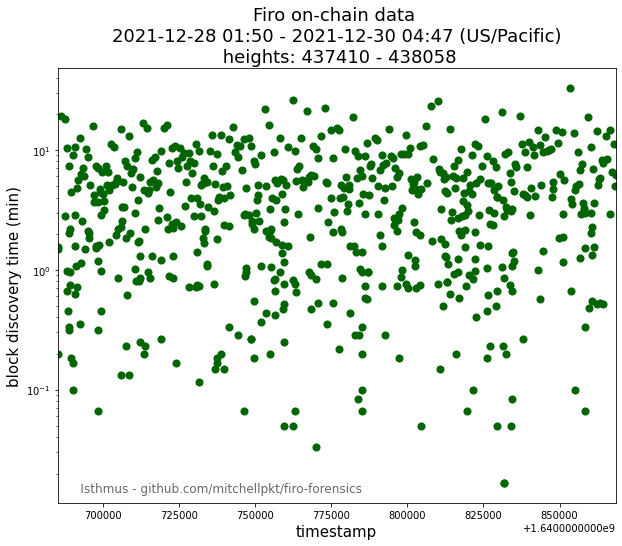

In [9]:
isli.scatter(df.timestamp_unix[1:], diffs, ylabel='block discovery time (min)', xlabel='timestamp', title=title,
             style=style.override({'watermark_placement': (-0.05, 0.025)}), log_axes='y', );

## From node records

Import and process the node records

In [10]:
threshold = 500_000
df_node_raw: pd.DataFrame = pd.read_csv(
    pathlib.Path.cwd() / '..' / 'data_local_only' / 'debug-logs' / 'debug01_blocks.csv')
df_node: pd.DataFrame = df_node_raw.loc[df_node_raw.loc[:, 'height'] < threshold, :]
df_node.sort_values(by='height', ascending=True, inplace=True)
df_node.drop_duplicates(inplace=True)
df_node.reset_index(inplace=True, drop=True)
df_node['timestamp'] = [isli.machine_time(x) for x in df_node.timestamp_human]
df_node

/home/mglrnd/Projects/GitHub/firo-forensics/env/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/tmp/ipykernel_75997/3413099976.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_node['timestamp'] = [isli.machine_time(x) for x in df_node.timestamp_human]


,timestamp_human,height,hash,timestamp
0,2021-12-28 12:32:36,437449,5f252d7978d2892766c72ddcb8f52ac490ba0fe0f3d041...,1.640720e+09
1,2021-12-28 12:39:32,437450,9f9a0b8b8b5e55564cc22532820c780ff46772981ef181...,1.640720e+09
2,2021-12-28 12:41:34,437451,7fbf34646a5bf57d182f17daa0b416991fc1a36dfec579...,1.640720e+09
3,2021-12-28 12:43:25,437452,13aece246093ce517c4f40364f48212140abba8b3d45d0...,1.640721e+09
4,2021-12-28 12:43:41,437453,26817a6b10ef782bda141a836812deea693be28be4f074...,1.640721e+09
...,...,...,...,...
1013,2022-01-01 00:59:19,438461,b9b82223218c047d34ba7f3f8c8d2ce31667b21818edd7...,1.641024e+09
1014,2022-01-01 01:01:30,438462,46e531438b5b9bb86d273c7c9e517c07a18dfb02e5187e...,1.641024e+09
1015,2022-01-01 01:08:57,438463,7ef3aa2e883d2fce7245d31ac3c9b938acd2da51689bf4...,1.641025e+09
1016,2022-01-01 01:09:52,438464,8572d6453c480b89ddf94e2c20c08a0b9ea254cc4a9544...,1.641025e+09


### Peek at data quality
These next few cells are boring, we just identify a duplicate record and remove it

,timestamp_human,height,hash,timestamp
395,2021-12-29 18:58:04,437844,8a5cddb08388cf825c5fe80cbd18ed896ea7ffb9493a62...,1.640829e+09
396,2021-12-29 18:58:05,437844,8a5cddb08388cf825c5fe80cbd18ed896ea7ffb9493a62...,1.640829e+09


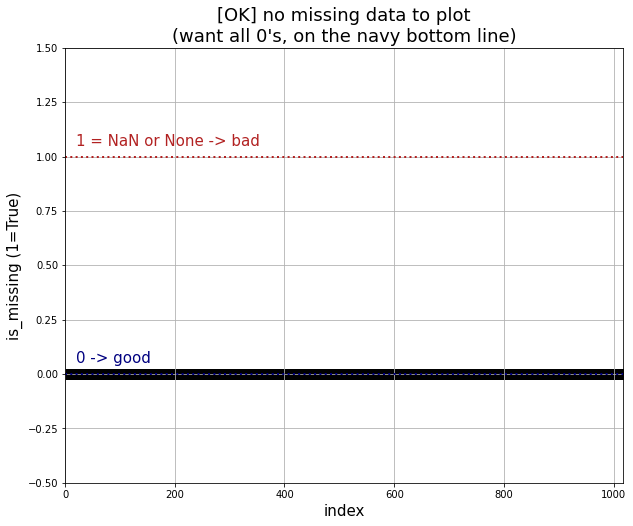

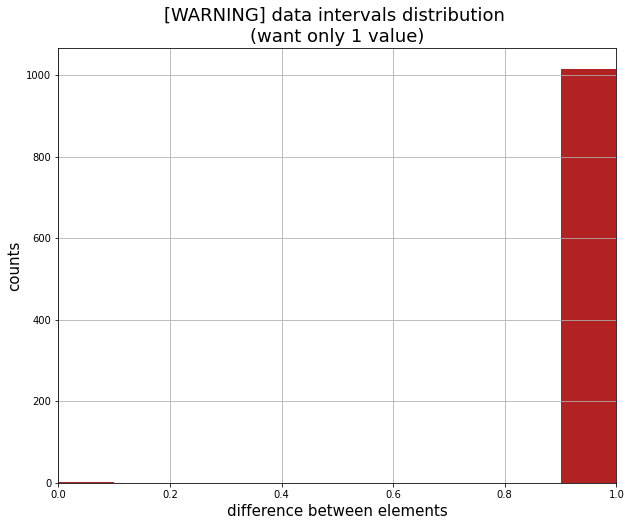

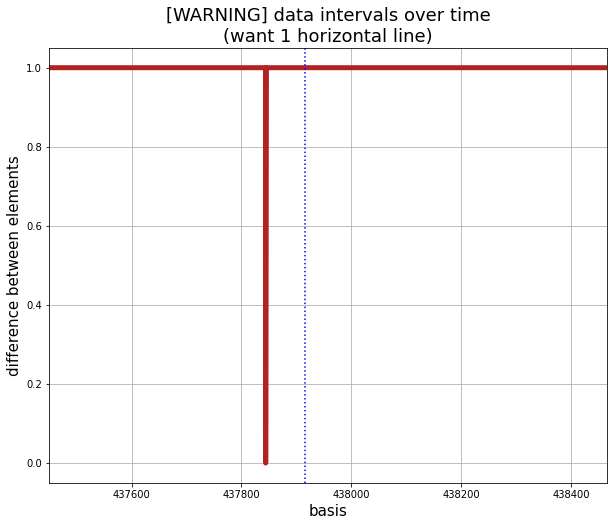

In [11]:
isli.basis_quality_plots(df_node.height)
marker_line()
df_node[df_node.height == 437844]

In [12]:
df_node.drop(index=[df_node[df_node.height == 437844].index[0]], inplace=True)
df_node.reset_index(inplace=True, drop=True)
df_node

/home/mglrnd/Projects/GitHub/firo-forensics/env/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,timestamp_human,height,hash,timestamp
0,2021-12-28 12:32:36,437449,5f252d7978d2892766c72ddcb8f52ac490ba0fe0f3d041...,1.640720e+09
1,2021-12-28 12:39:32,437450,9f9a0b8b8b5e55564cc22532820c780ff46772981ef181...,1.640720e+09
2,2021-12-28 12:41:34,437451,7fbf34646a5bf57d182f17daa0b416991fc1a36dfec579...,1.640720e+09
3,2021-12-28 12:43:25,437452,13aece246093ce517c4f40364f48212140abba8b3d45d0...,1.640721e+09
4,2021-12-28 12:43:41,437453,26817a6b10ef782bda141a836812deea693be28be4f074...,1.640721e+09
...,...,...,...,...
1012,2022-01-01 00:59:19,438461,b9b82223218c047d34ba7f3f8c8d2ce31667b21818edd7...,1.641024e+09
1013,2022-01-01 01:01:30,438462,46e531438b5b9bb86d273c7c9e517c07a18dfb02e5187e...,1.641024e+09
1014,2022-01-01 01:08:57,438463,7ef3aa2e883d2fce7245d31ac3c9b938acd2da51689bf4...,1.641025e+09
1015,2022-01-01 01:09:52,438464,8572d6453c480b89ddf94e2c20c08a0b9ea254cc4a9544...,1.641025e+09


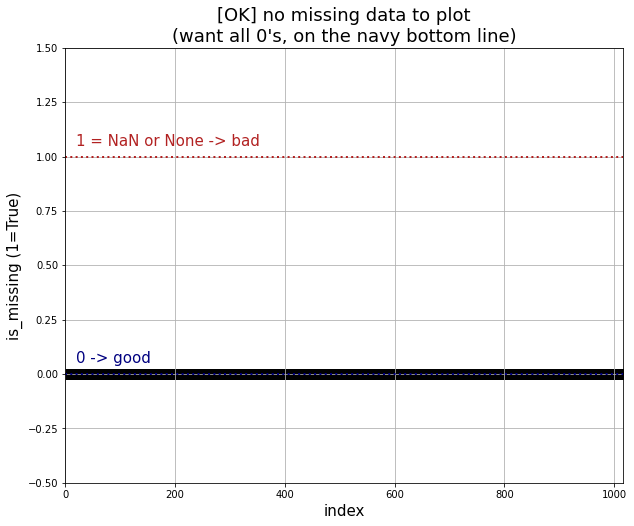

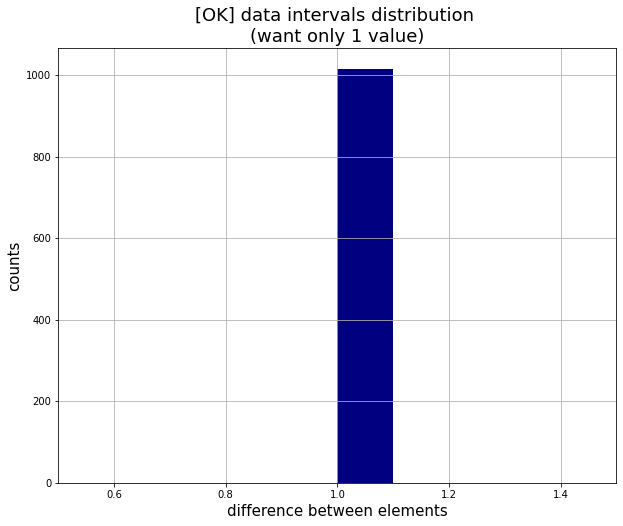

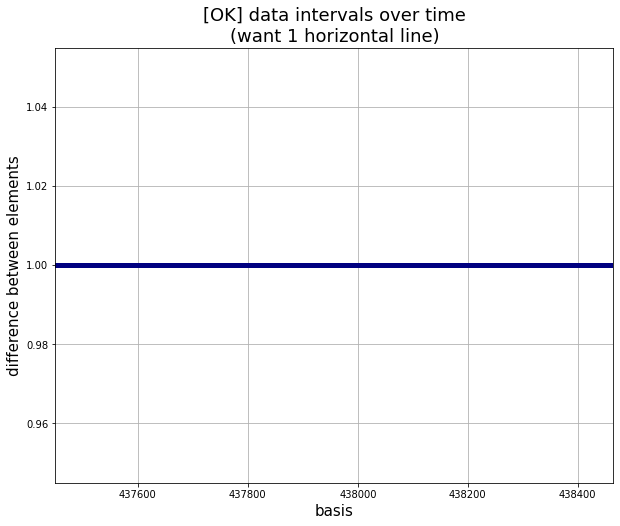

In [13]:
isli.basis_quality_plots(df_node.height);

## Review the data from the node

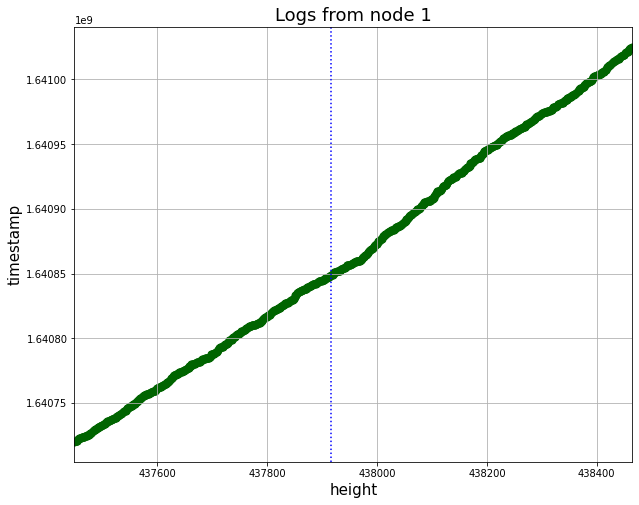

In [14]:
isli.scatter(df_node, 'height', 'timestamp', legend_strings='', title='Logs from node 1');
marker_line();

### Join the node data to the chain metadata

In [15]:
df['height'] = df.block_height.astype(int)
dfj: pd.DataFrame = pd.DataFrame()
for h in df.height:
    if h in list(df_node.height):
        try:
            dfj = dfj.append({
                'height': h,
                'timestamp_node': int(df_node[df_node['height'] == h].timestamp) - 7 * 60 * 60,  # time zone adjustment
                'timestamp_block': int(df[df['block_height'] == h].timestamp_unix)}, ignore_index=True)
        except Exception as e:
            print(f"Exception: {e}")
dfj['diff'] = dfj['timestamp_node'] - dfj['timestamp_block']
dfj

,height,timestamp_node,timestamp_block,diff
0,437449.0,1.640695e+09,1.640695e+09,228.0
1,437450.0,1.640695e+09,1.640695e+09,126.0
2,437451.0,1.640695e+09,1.640695e+09,122.0
3,437452.0,1.640695e+09,1.640695e+09,111.0
4,437453.0,1.640695e+09,1.640695e+09,16.0
...,...,...,...,...
605,438054.0,1.640867e+09,1.640867e+09,100.0
606,438055.0,1.640867e+09,1.640867e+09,97.0
607,438056.0,1.640868e+09,1.640868e+09,11.0
608,438057.0,1.640868e+09,1.640868e+09,79.0


### Compare the timestamps

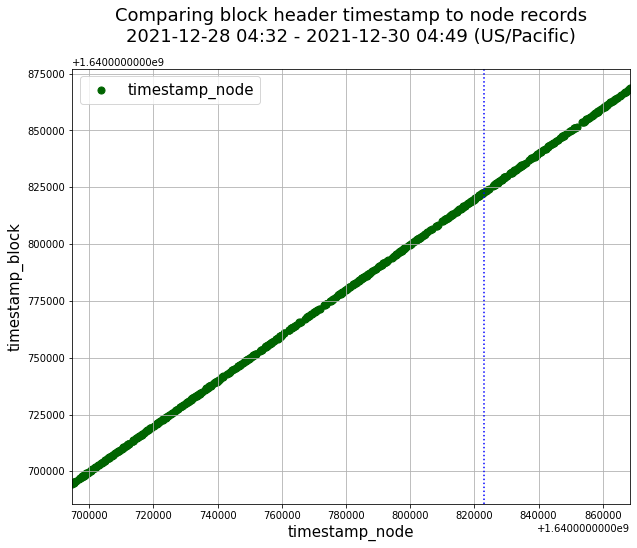

In [16]:
isli.scatter(dfj, 'timestamp_node', 'timestamp_block',
             title=(
                 t := f'Comparing block header timestamp to node records\n{isli.human_time(min(dfj.timestamp_node), formatter="%Y-%m-%d %H:%M", include_timezone=False)} - {isli.human_time(max(dfj.timestamp_node), formatter="%Y-%m-%d %H:%M")}\n'));
isli.plt.axvline(x=isli.machine_time('2021-12-30T00:10:00Z'), color='b', linestyle=':');

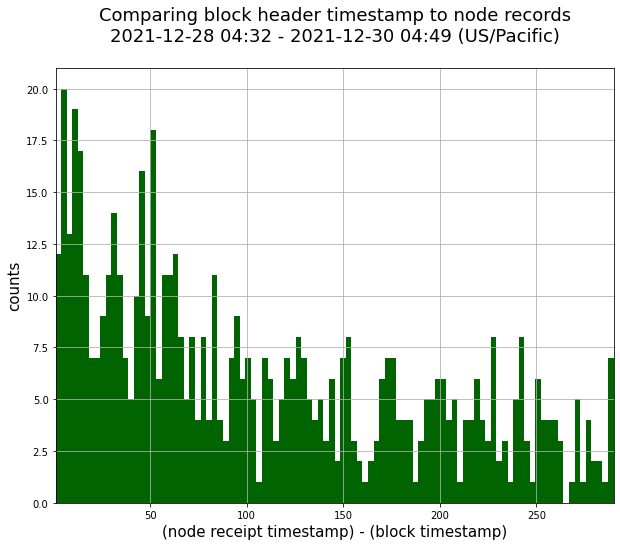

In [17]:
isli.hist(dfj['diff'], xlabel='(node receipt timestamp) - (block timestamp)', title=t, bins=100);